## BE Data Science

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Chargement des données brutes en mémoire


In [7]:
import pandas as pd
import csv

def read_ds(ds_name: str):
    rows = []
    
    with open(ds_name, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    sample_line = lines[0]
    sniffer = csv.Sniffer()
    try:
        dialect = sniffer.sniff(sample_line)
        delim = dialect.delimiter
    except csv.Error:
        delim = ","   
    
    for line in lines:
        line = line.strip()
        if not line:
            continue  
        
        parts = line.split(delim)
        rows.append(parts)
    

    max_len = max(len(r) for r in rows)
    
   
    columns = ["util", "navigateur"] + [f"action_{i}" for i in range(1, max_len - 1)]

    normalized_rows = [r + [None]*(max_len - len(r)) for r in rows]
    
    df = pd.DataFrame(normalized_rows, columns=columns)
    return df



In [8]:
features_train = read_ds("train.csv")
features_test = read_ds("test.csv")
features_train.shape, features_test.shape

((3279, 14470), (324, 7726))

In [9]:
features_train.head()

,util,navigateur,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,...,action_14459,action_14460,action_14461,action_14462,action_14463,action_14464,action_14465,action_14466,action_14467,action_14468
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,...,None,None,None,None,None,None,None,None,None,None
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,None,None,None,None,None,None,None,None,None,None
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,None,None,None,None,None,None,None,None,None,None
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,None,None,None,None,None,None,None,None,None,None


### Première analyse de ces données

In [20]:
features_train.iloc[:, :20].head()

,util,navigateur,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,action_9,action_10,action_11,action_12,action_13,action_14,action_15,action_16,action_17,action_18
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,Affichage d'un toast,Lancement d'une stat(infologic.core.gui.contro...,t10
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,Exécution d'un bouton,Chainage,t20,Sélection d’un onglet(MAJ),t25,Sélection d'un écran(infologic.orga.modules.OR...,Sélection d'un écran,Exécution d'un bouton,Chainage,t30
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,Création d'un écran,t5,Clic sur une grille d'historique de recherche,Raccourci,Exécution d'un bouton,Affichage d'une dialogue,t10,Clic sur une grille d'historique de recherche,Raccourci,Exécution d'un bouton
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,t10,Filtrage / Tri(MAINT),Clic sur une grille d'historique de recherche,Sélection d'un flag,Filtrage / Tri,t15,Affichage d'une dialogue,Clic sur une grille d'historique de recherche,Affichage d'une dialogue,t20
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,t15,Fermeture d'une dialogue,t20,Sélection d'un écran(infologic.crm.modules.CRM...,Exécution d'un bouton,Action de table,Affichage d'un toast,Affichage d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton


In [23]:
number_unique_navigators = list(features_train['navigateur'].value_counts())
print(len(number_unique_navigators))

4


Let's now define functions that we might use later to see the graphs.

In [24]:
import warnings
from IPython.display import display, Markdown

# décorateurs utilitaires pour supprimer les avertissements de la sortie et imprimer un cadre de données dans un tableau Markdown.
def ignore_warnings(f):
    def _f(*args, **kwargs):
        warnings.filterwarnings('ignore')
        v = f(*args, **kwargs)
        warnings.filterwarnings('default')
        return v
    return _f

# affiche un DataFrame Pandas sous forme de tableau Markdown dans un notebook Jupyter.
def markdown_table(headNtail=False, use_index=True, title=None, precision=2):
    def _get_value(val): return str(round(val, precision) if isinstance(val, float) else val)
    def _format_row(row): 
        row_str = ""
        if use_index: row_str += f"|{str(row.name)}"
        for value in row.values: row_str += f"| {_get_value(value)}"
        return row_str + "|"
    def _get_str(df):
        return "\n".join(df.apply(_format_row, axis=1))
    def _deco(f):
        def _f(*args, **kwargs):
            df = f(*args, **kwargs)
            _str = f"#### {title}\n" if title else ""
            header = ([str(df.index.name)] if use_index else []) + df.columns.astype(str).to_list() 
            _str += f"|{'|'.join(header)}|" + f"\n|{'--|'*len(header)}\n" if header else None
            if headNtail:
                _str += _get_str(df.head())
                _str += "\n|...|...|\n"
                _str += _get_str(df.tail())
            else:
                _str += _get_str(df)
            display(Markdown(_str))
        return _f
    return _deco

# fonction utilitaire permettant d'obtenir une grille graphique à partir d'un nombre arbitraire de lignes/colonnes ou de données.
def get_grid(n, n_row=None, n_col=None, titles=None, figsize=(10, 8), wspace=.5, hspace=.5, **kwargs):
    if n_row: n_col= n_col or math.floor(n/n_row)
    elif n_col: n_row= n_row or math.ceil(n/n_col)
    else:
        n_row = math.ceil(math.sqrt(n))
        n_col = math.floor(n/n_row)
    fig, axs = plt.subplots(n_row, n_col, figsize=figsize, **kwargs)
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    if titles is not None:
        for ax, title in zip(axs.flat, titles): ax.set_title(title)
    return fig, axs

In [29]:
features_train["util"]


0       nuh
1       muz
2       zrx
3       pou
4       ald
       ... 
3274    muz
3275    cjr
3276    fuz
3277    cjr
3278    fwf
Name: util, Length: 3279, dtype: object

In [33]:
user_nav_grouped = features_train.groupby("util")["navigateur"].apply(list)
print(user_nav_grouped)

util
aho    [Google Chrome, Google Chrome, Google Chrome, ...
ajo    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
akx    [Google Chrome, Google Chrome, Google Chrome, ...
ald    [Google Chrome, Google Chrome, Google Chrome, ...
ats    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
                             ...                        
zqs    [Microsoft Edge, Microsoft Edge, Microsoft Edg...
zro    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
zrx    [Microsoft Edge, Microsoft Edge, Microsoft Edg...
zus    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
zyk    [Google Chrome, Google Chrome, Google Chrome, ...
Name: navigateur, Length: 247, dtype: object


In [41]:
@markdown_table(title="Navigateur par utilisateur", headNtail=True)
def browsers_per_player(df):
    user_nav_grouped = df.groupby("util")["navigateur"].apply(list).reset_index()
    return user_nav_grouped

browser_user_df = browsers_per_player(features_train)



#### Navigateur par utilisateur
|None|util|navigateur|
|--|--|--|
|0| aho| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|1| ajo| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|2| akx| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|3| ald| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|4| ats| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|...|...|
|242| zqs| ['Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge']|
|243| zro| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|244| zrx| ['Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge']|
|245| zus| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|246| zyk| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|

We can observe that the user is always using the same browser to do the actions. Let's see if some users still used several browsers.

In [44]:
user_nav_grouped = features_train.groupby("util")["navigateur"].apply(list).reset_index()


user_nav_grouped["unique_browsers_count"] = user_nav_grouped["navigateur"].apply(lambda x: len(set(x)))
filtered_users = user_nav_grouped[user_nav_grouped["unique_browsers_count"] > 1]


filtered_users = filtered_users[["util", "navigateur"]]

filtered_users.head()

,util,navigateur


There is absolutely no user that is using more than one browser. The users can be classified in different categories by the browsers they use. If this is then linked to any activity we can train on the dataset on those features.

In [48]:
@markdown_table(headNtail=True, title="Stats: Y distribution")
def get_Y_stats(df,key):
    y_counts = df[key].value_counts().reset_index()
    y_counts.columns = ["Y_value", "count"]
    return y_counts

get_Y_stats(features_train,"util")
get_Y_stats(features_train,"navigateur")


#### Stats: Y distribution
|None|Y_value|count|
|--|--|--|
|0| skm| 75|
|1| slq| 71|
|2| cjr| 46|
|3| flj| 42|
|4| hjs| 37|
|...|...|
|242| rff| 4|
|243| bez| 4|
|244| crn| 4|
|245| azn| 4|
|246| fyg| 4|

#### Stats: Y distribution
|None|Y_value|count|
|--|--|--|
|0| Firefox| 1466|
|1| Google Chrome| 1339|
|2| Microsoft Edge| 451|
|3| Opera| 23|
|...|...|
|0| Firefox| 1466|
|1| Google Chrome| 1339|
|2| Microsoft Edge| 451|
|3| Opera| 23|

Now we will summarize all the statistics that we can retrieve from our dataset in a table. 
Per user, per browser, we have:
- nb_actions = number of actions for a given user session
- temps_total = total duration of a given user session
- vitesse = average time per action
- ecart_type_temps = variable used to supplement speed information by analyzing the variability of time between actions
- taux_repetition = proportion of consecutive identical actions within the session. (we compare each action with the previous one, if it's the same we add one and then we divde the score by the number of actions)
- longueur_moyenne_sequence: Average length of consecutive identical action sequences.
- diversite_actions = Ratio of unique action types to total actions (measures behavioral variety).
- action_plus_frequente = The most frequently occurring action type in the session.
- %_Affichage = Percentage of actions related to “Affichage” (display/show events).
- %_Exécution = Percentage of actions related to “Exécution” (button executions or clicks).
- %_Fermeture = Percentage of actions related to “Fermeture” (closing dialogs or windows).
- %_Création = Percentage of actions related to “Création” (creating or opening new screens).
- %_Autres = Percentage of actions not included in the main categories above

In [34]:
def analyser_session_complete(session_str):
    parts = session_str.split(',')
    if len(parts) < 3:
        return None
    
    utilisateur = parts[0]
    navigateur = parts[1]
    actions = parts[2:]

    current_time = 0
    timeline = []

    for elem in actions:
        match = re.match(r't(\d+)', elem.strip())
        if match:
            current_time = int(match.group(1))
        else:
            timeline.append((current_time, elem.strip()))

    df = pd.DataFrame(timeline, columns=["temps", "action"])
    if df.empty:
        return None

    #Nettoyage et extraction de type d’action
    df["action_type"] = df["action"].apply(lambda x: x.split("(")[0].strip())

    #Statistiques de base
    nb_actions = len(df)
    temps_total = df["temps"].max() - df["temps"].min() if nb_actions > 1 else 0

    df["delta"] = df["temps"].diff().fillna(0)
    vitesse = temps_total / nb_actions if nb_actions > 1 else 0
    ecart_type_temps = df["delta"].std()

    #Répétitions et diversités des actions
    diversite_actions = df["action_type"].nunique() / nb_actions
    action_plus_frequente = df["action_type"].value_counts().idxmax()

    df["repetition"] = (df["action_type"] == df["action_type"].shift(1)).astype(int)
    taux_repetition = df["repetition"].mean()

    sequences = []
    current_seq = 1
    for i in range(1, len(df)):
        if df["action_type"].iloc[i] == df["action_type"].iloc[i - 1]:
            current_seq += 1
        else:
            sequences.append(current_seq)
            current_seq = 1
    sequences.append(current_seq)
    longueur_moyenne_sequence = sum(sequences) / len(sequences) if sequences else 0

    #Classification des types d'actions
    def freq(motcle):
        return (df["action_type"].str.contains(motcle, case=False, regex=False)).mean()

    freq_affichage = freq("Affichage")
    freq_execution = freq("Exécution")
    freq_fermeture = freq("Fermeture")
    freq_creation = freq("Création")
    freq_autres = 1 - (freq_affichage + freq_execution + freq_fermeture + freq_creation)

    return {
        "utilisateur": utilisateur,
        "navigateur": navigateur,
        "nb_actions": nb_actions,
        "temps_total": temps_total,
        "vitesse": round(vitesse, 2),
        "ecart_type_temps": round(ecart_type_temps, 2),
        "taux_repetition": round(taux_repetition, 3),
        "longueur_moyenne_sequence": round(longueur_moyenne_sequence, 2),
        "diversite_actions": round(diversite_actions, 2),
        "action_plus_frequente": action_plus_frequente,
        "%_Affichage": round(freq_affichage, 2),
        "%_Exécution": round(freq_execution, 2),
        "%_Fermeture": round(freq_fermeture, 2),
        "%_Création": round(freq_creation, 2),
        "%_Autres": round(freq_autres, 2)
    }

# --- Affichage ---
pd.options.display.float_format = '{:.2f}'.format
display(df_stats)


,utilisateur,navigateur,nb_actions,temps_total,vitesse,ecart_type_temps,taux_repetition,longueur_moyenne_sequence,diversite_actions,action_plus_frequente,%_Affichage,%_Exécution,%_Fermeture,%_Création,%_Autres
0,nuh,Firefox,6,10,1.67,2.58,0.00,1.00,0.83,Affichage d'une dialogue,0.33,0.17,0.33,0.17,0.00
1,abc,Chrome,4,20,5.00,5.77,0.00,1.00,1.00,Affichage d'un écran,0.50,0.25,0.25,0.00,0.00
2,xyz,Edge,4,24,6.00,4.00,0.00,1.00,1.00,Affichage d'une fenêtre,0.50,0.25,0.25,0.00,0.00
3,jcp,Firefox,3,8,2.67,2.31,0.00,1.00,1.00,Affichage d'un écran,0.33,0.00,0.33,0.00,0.33
4,mld,Chrome,4,9,2.25,1.50,0.00,1.00,1.00,Création d'un écran,0.25,0.25,0.25,0.25,0.00
5,kty,Edge,3,4,1.33,1.15,0.00,1.00,1.00,Affichage d'une boîte,0.33,0.00,0.67,0.00,0.00


### Construction de caractéristiques

#### Traitements préliminaires

Let's inspect if there is any outliers in our dataset. To do so, we need to check the occurences of actions and remove the ones that occur the less. 

We first check what are the actions and we want to see if there are any actions that are out of the formal ones. 

In [58]:
def get_action_counts(df):
    action_cols = [col for col in df.columns if col.startswith("action_")]
    all_actions = df[action_cols].values.ravel()
    all_actions_series = pd.Series(all_actions).dropna()
    action_counts = all_actions_series.value_counts()
    
    return action_counts

action_counts = get_action_counts(features_train)

action_counts_df = action_counts.reset_index()
action_counts_df.columns = ["action", "count"]
action_counts_df.head()



,action,count
0,Exécution d'un bouton,265323
1,Saisie dans un champ,127325
2,Lancement d'une action générique,115069
3,Fermeture d'une dialogue,90338
4,Exécution d'un bouton1,89331


In [57]:
action_counts_df.tail()

,action,count
9440,Sélection d'un écran<DEF_03/24>$MAJ$,1
9441,Filtrage / Tri(infologic.acti.modules.AT_ACTIV...,1
9442,Dissimulation d'une arborescence(infologic.cor...,1
9443,Exécution d'un bouton<Défaut>1,1
9444,Chainage(MAINT)$EDI$,1


We can see that there are actions that occure only 1 time which is a very odd data and we don't want to train on those values. We are opting for a frequency-based filtering approach. We chose to keep 99% of the total informations in the df. 

In [64]:
p = 0.99
def filter_actions(df,list_actions,p):
    action_cols = [col for col in df.columns if col.startswith("action_")]
    cumulative_pct = (list_actions.cumsum() / list_actions.sum())
    actions_to_keep = cumulative_pct[cumulative_pct <= p].index

    print(f"Keeping {len(actions_to_keep)} actions out of {len(list_actions)} "
          f"({100 * len(actions_to_keep) / len(list_actions):.2f}% of unique actions).")

    df_filtered = df.copy()
    df_filtered[action_cols] = df_filtered[action_cols].applymap(
        lambda x: x if x in actions_to_keep else None
    )

    return df_filtered, actions_to_keep


filtered_train_data, actions_to_keep = filter_actions(features_train,action_counts,0.99)


Keeping 3124 actions out of 9445 (33.08% of unique actions).


# Model 2: MLP
Pour la construction du modèle à neurones artificiel, on reprend les features trouvées plus tôt et on intègre un tableau de configuration de paramètres afin de les faire varier pour trouver la combinaison de paramètres qui nous fait obtenir le meilleur score. 
En testant différentes fonctions d'activation, c'est avec tanh que nous obtenons les meilleures résultats. On fait varier les paramètres un par un pour fixer une valeur et ensuite tester différentes combinaisons de couches de neurones cachées. 

Dans un second temps on va essayer de tester le réseaux avec connexion récurrente entre les couches. Cette seconde méthode est difficile à tester sur nos machines car une version à performance satisfaisante est assez preneuse en coût. 

Loading data...
Building features...
Epoch 01/70 — F1 train: 0.0276 | F1 val: 0.0330
Epoch 02/70 — F1 train: 0.0896 | F1 val: 0.0709
Epoch 03/70 — F1 train: 0.1582 | F1 val: 0.1518
Epoch 04/70 — F1 train: 0.2297 | F1 val: 0.2221
Epoch 05/70 — F1 train: 0.2690 | F1 val: 0.2842
Epoch 06/70 — F1 train: 0.3119 | F1 val: 0.2864
Epoch 07/70 — F1 train: 0.3396 | F1 val: 0.3241
Epoch 08/70 — F1 train: 0.3858 | F1 val: 0.3547
Epoch 09/70 — F1 train: 0.4209 | F1 val: 0.3782
Epoch 10/70 — F1 train: 0.4504 | F1 val: 0.3862
Epoch 11/70 — F1 train: 0.4937 | F1 val: 0.4403
Epoch 12/70 — F1 train: 0.5202 | F1 val: 0.4583
Epoch 13/70 — F1 train: 0.5652 | F1 val: 0.4483
Epoch 14/70 — F1 train: 0.5958 | F1 val: 0.4467
Epoch 15/70 — F1 train: 0.6385 | F1 val: 0.4915
Epoch 16/70 — F1 train: 0.6549 | F1 val: 0.5219
Epoch 17/70 — F1 train: 0.6647 | F1 val: 0.5206
Epoch 18/70 — F1 train: 0.6883 | F1 val: 0.5383
Epoch 19/70 — F1 train: 0.6985 | F1 val: 0.5460
Epoch 20/70 — F1 train: 0.7211 | F1 val: 0.5450
Epo

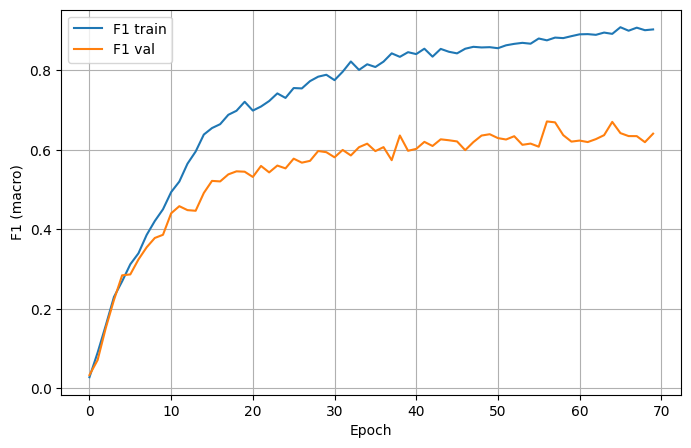


Best validation F1 (macro): 0.6716


In [51]:
# ============================
# CONFIGURATION
# ============================
CONFIG = {
    "hidden_layers": [512, 256, 128, 64],
    "activation": "tanh",
    "dropout_rate": 0.2,
    "epochs": 70,
    "batch_size": 32,
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
    "test_size": 0.1,
    "random_state": 42,
    "top_k_actions": 50,
    "use_browser_ohe": True,
    "train_file": "train.csv",
}

# ============================
# IMPORTS
# ============================
import re, os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# ============================
# UTILITIES
# ============================
def read_ds(ds_name: str):
    sessions = []
    with open(ds_name, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line: 
                continue
            if (line.startswith('"') and line.endswith('"')) or (line.startswith("'") and line.endswith("'")):
                line = line[1:-1]
            parts = line.split(',')
            util = parts[0]
            browser = parts[1] if len(parts) > 1 else ""
            actions = parts[2:]
            sessions.append({"util": util, "browser": browser, "parts": actions})
    return pd.DataFrame(sessions)

def filter_action(value: str):
    if not isinstance(value, str):
        return ""
    if value.startswith("t") and value[1:].isdigit():
        return ""
    for delim in ["(", "<", "$", "1"]:
        if delim in value:
            idx = value.find(delim)
            if idx > 0:
                value = value[:idx]
    return value.strip()

# ============================
# FEATURE ENGINEERING
# ============================
def session_to_features(parts):
    times, actions_clean, timeline = [], [], []
    current_time = 0
    for token in parts:
        tok = token.strip()
        m = re.match(r'^t(\d+)$', tok)
        if m:
            current_time = int(m.group(1))
            continue
        timeline.append((current_time, tok))
        a = filter_action(tok)
        if a:
            actions_clean.append(a)

    if not timeline:
        return {k:0.0 for k in [
            "nb_actions","nb_actions_unique","temps_total","moyenne_delta","std_delta",
            "delta_min","delta_max","delta_median","taux_repetition",
            "longueur_moyenne_sequence","longest_repeat","diversite_actions",
            "top3_ratio","unique_transitions","actions_joined"
        ]}

    times_list = [t for t,_ in timeline]
    deltas = [0.0] + [times_list[i]-times_list[i-1] for i in range(1,len(times_list))]
    nb_actions = len(timeline)
    nb_actions_unique = len(set(actions_clean))
    temps_total = float(times_list[-1]-times_list[0]) if len(times_list)>1 else 0.0
    moyenne_delta = float(np.mean(deltas))
    std_delta = float(np.std(deltas, ddof=1)) if len(deltas)>1 else 0.0
    delta_min = float(np.min(deltas))
    delta_max = float(np.max(deltas))
    delta_median = float(np.median(deltas))

    rep_flags = [1 if actions_clean[i]==actions_clean[i-1] else 0 for i in range(1,len(actions_clean))]
    taux_repetition = float(np.mean(rep_flags)) if rep_flags else 0.0
    seqs, cur = [], 1
    for i in range(1,len(actions_clean)):
        if actions_clean[i]==actions_clean[i-1]: cur+=1
        else: seqs.append(cur); cur=1
    if actions_clean: seqs.append(cur)
    longueur_moy_seq = float(np.mean(seqs)) if seqs else 0.0
    longest_repeat = float(max(seqs)) if seqs else 0.0

    diversite = float(nb_actions_unique/nb_actions) if nb_actions>0 else 0.0
    counts = Counter(actions_clean)
    top3_ratio = sum([counts[a] for a,_ in counts.most_common(3)]) / nb_actions
    bigrams = list(zip(actions_clean[:-1], actions_clean[1:]))
    unique_transitions = len(set(bigrams))

    return {
        "nb_actions": nb_actions,
        "nb_actions_unique": nb_actions_unique,
        "temps_total": temps_total,
        "moyenne_delta": moyenne_delta,
        "std_delta": std_delta,
        "delta_min": delta_min,
        "delta_max": delta_max,
        "delta_median": delta_median,
        "taux_repetition": taux_repetition,
        "longueur_moyenne_sequence": longueur_moy_seq,
        "longest_repeat": longest_repeat,
        "diversite_actions": diversite,
        "top3_ratio": top3_ratio,
        "unique_transitions": unique_transitions,
        "actions_joined": " ".join([a.replace(" ","_") for a in actions_clean])
    }

def build_features_df(df_in):
    rows = []
    for _, row in df_in.iterrows():
        feats = session_to_features(row["parts"])
        feats["browser"] = row["browser"]
        feats["util"] = row["util"]
        rows.append(feats)
    return pd.DataFrame(rows)

# ============================
# MAIN PIPELINE
# ============================
def main_pipeline(config=CONFIG):
    print("Loading data...")
    train_raw = read_ds(config["train_file"])

    print("Building features...")
    train_basic = build_features_df(train_raw)
    train_basic = train_basic[train_basic["nb_actions"]>0].reset_index(drop=True)

    # Action vectorization
    vectorizer = CountVectorizer(max_features=config["top_k_actions"])
    vectorizer.fit(train_basic["actions_joined"].fillna(""))
    X_actions = vectorizer.transform(train_basic["actions_joined"].fillna("")).toarray()

    # Numeric features
    numeric_cols = [
        "nb_actions","nb_actions_unique","temps_total","moyenne_delta","std_delta",
        "delta_min","delta_max","delta_median","taux_repetition",
        "longueur_moyenne_sequence","longest_repeat","diversite_actions",
        "top3_ratio","unique_transitions"
    ]
    scaler = StandardScaler()
    X_num = scaler.fit_transform(train_basic[numeric_cols].fillna(0).values)

    # Browser encoding
    if config["use_browser_ohe"]:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        X_browser = ohe.fit_transform(train_basic[["browser"]].fillna("UNK"))
    else:
        X_browser = np.zeros((len(train_basic),0))

    # Combine all features
    X_full = np.hstack([X_num, X_browser, X_actions])

    # Labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(train_basic["util"].astype(str))
    n_classes = len(label_encoder.classes_)

    # Train / validation split
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_full, y, test_size=config["test_size"],
        random_state=config["random_state"], stratify=y
    )

    # MLP model
    tf.keras.backend.clear_session()
    model = Sequential()
    input_dim = X_tr.shape[1]

    model.add(Dense(config["hidden_layers"][0], activation=config["activation"], input_shape=(input_dim,)))
    model.add(Dropout(config["dropout_rate"]))
    for neurons in config["hidden_layers"][1:]:
        model.add(Dense(neurons, activation=config["activation"]))
        model.add(Dropout(config["dropout_rate"]))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer=config["optimizer"], loss=config["loss"])

    # Training with F1 tracking
    f1_tr_list, f1_val_list = [], []
    best_f1_val = -1

    for epoch in range(config["epochs"]):
        model.fit(X_tr, tf.keras.utils.to_categorical(y_tr, n_classes),
                  epochs=1, batch_size=config["batch_size"],
                  validation_data=(X_val, tf.keras.utils.to_categorical(y_val, n_classes)),
                  verbose=0)

        y_pred_tr = np.argmax(model.predict(X_tr, verbose=0), axis=1)
        y_pred_val = np.argmax(model.predict(X_val, verbose=0), axis=1)

        f1_tr = f1_score(y_tr, y_pred_tr, average='macro', zero_division=0)
        f1_val = f1_score(y_val, y_pred_val, average='macro', zero_division=0)

        f1_tr_list.append(f1_tr)
        f1_val_list.append(f1_val)

        print(f"Epoch {epoch+1:02d}/{config['epochs']} — F1 train: {f1_tr:.4f} | F1 val: {f1_val:.4f}")

        if f1_val > best_f1_val:
            best_f1_val = f1_val

    # Plot F1 evolution
    plt.figure(figsize=(8,5))
    plt.plot(f1_tr_list, label="F1 train")
    plt.plot(f1_val_list, label="F1 val")
    plt.xlabel("Epoch")
    plt.ylabel("F1 (macro)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nBest validation F1 (macro): {best_f1_val:.4f}")

# ============================
# RUN
# ============================
if __name__ == "__main__":
    main_pipeline(CONFIG)


### Modèle neuronal à couches récurrentes

In [ ]:

from statistics import mean
from itertools import islice
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# -----------------------------
# UTIL
# -----------------------------
pattern_ecran = re.compile(r"\((.*?)\)")
pattern_conf = re.compile(r"<(.*?)>")
pattern_chaine = re.compile(r"\$(.*?)\$")

def read_ds(filename: str, has_label: bool = True):
    """Read CSV-like file into DataFrame."""
    if not os.path.exists(filename):
        raise FileNotFoundError(f"{filename} not found")
    rows = []
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line: continue
            if (line.startswith('"') and line.endswith('"')) or (line.startswith("'") and line.endswith("'")):
                line = line[1:-1]
            parts = line.split(',')
            if has_label:
                util, navigateur, actions = parts[0], parts[1] if len(parts)>1 else "", parts[2:]
            else:
                util, navigateur, actions = None, parts[0] if len(parts)>1 else "", parts[1:] if len(parts)>1 else parts
            rows.append({"util": util, "navigateur": navigateur, "parts": actions})
    return pd.DataFrame(rows)

def filter_action(value: str):
    if not isinstance(value, str): return ""
    if value.startswith("t") and value[1:].isdigit(): return ""
    for delim in ["(", "<", "$", "1"]:
        if delim in value:
            idx = value.find(delim)
            if idx > 0: value = value[:idx]
    return value.strip()

def ngrams(lst, n):
    return zip(*(islice(lst, i, None) for i in range(n)))

def extract_features_from_parts(parts, top_action_set=None, top_bigram_set=None):
    feats = {}
    actions_raw = [p for p in parts if isinstance(p,str)]
    t_marks, actions = [], []
    for a in actions_raw:
        a_strip = a.strip()
        if a_strip.startswith("t") and a_strip[1:].isdigit(): t_marks.append(int(a_strip[1:]))
        else:
            a_clean = filter_action(a_strip)
            if a_clean: actions.append(a_clean)

    feats["n_actions"] = len(actions)
    feats["n_unique_actions"] = len(set(actions))
    feats["repeat_ratio"] = 1.0 - (feats["n_unique_actions"]/feats["n_actions"]) if feats["n_actions"]>0 else 0.0
    feats["n_modif"] = sum(1 for r in actions_raw if isinstance(r,str) and r.strip().endswith("1"))
    feats["modif_ratio"] = feats["n_modif"]/feats["n_actions"] if feats["n_actions"]>0 else 0.0
    feats["t_count"] = len(t_marks)
    feats["max_time"] = max(t_marks) if t_marks else 0
    feats["avg_time_gap"] = mean([j-i for i,j in zip(t_marks[:-1], t_marks[1:])]) if len(t_marks)>1 else 0.0
    feats["tempo_density"] = feats["n_actions"] / (feats["max_time"]+1) if feats["max_time"]>=0 else 0.0

    # action counts
    a_counts = Counter(actions)
    if top_action_set is not None:
        for act in top_action_set: feats[f"act_{act}"] = a_counts.get(act,0)
    else:
        for act,cnt in a_counts.items(): feats[f"act_{act}"] = cnt

    # bigram counts
    bigrams = ["_".join(bg) for bg in ngrams(actions, 2)]
    b_counts = Counter(bigrams)
    if top_bigram_set is not None:
        for bg in top_bigram_set: feats[f"bigram_{bg}"] = b_counts.get(bg,0)
    else:
        for bg,cnt in b_counts.items(): feats[f"bigram_{bg}"] = cnt

    # longest consecutive repeat
    longest_repeat = 0
    if actions:
        cur = 1
        for i in range(1, len(actions)):
            if actions[i]==actions[i-1]: cur+=1
            else: longest_repeat=max(longest_repeat,cur); cur=1
        longest_repeat=max(longest_repeat,cur)
    feats["longest_repeat"] = longest_repeat

    feats["unique_transitions"] = len(set(bigrams))
    feats["actions_joined"] = " ".join([a.replace(" ", "_") for a in actions])
    return feats

# -----------------------------
# MAIN PIPELINE
# -----------------------------
def main_lstm_f1(config):
    train_raw = read_ds(config["train_file"], has_label=True)
    test_raw  = read_ds(config["test_file"],  has_label=False)

    # compute top actions/bigrams
    all_actions, all_bigrams = [], []
    for _, r in train_raw.iterrows():
        parts = [p for p in r["parts"] if isinstance(p,str)]
        actions = [filter_action(p.strip()) for p in parts if not (p.strip().startswith("t") and p.strip()[1:].isdigit()) and filter_action(p.strip())]
        all_actions.extend(actions)
        all_bigrams.extend(["_".join(bg) for bg in ngrams(actions, 2)])
    top_actions = [a for a,_ in Counter(all_actions).most_common(config["top_k_actions"])]
    top_bigrams = [b for b,_ in Counter(all_bigrams).most_common(config["top_k_bigrams"])]
    top_action_set, top_bigram_set = set(top_actions), set(top_bigrams)

    # extract tabular features
    df_train_feats = pd.DataFrame([extract_features_from_parts(r["parts"], top_action_set, top_bigram_set) | {"navigateur": r["navigateur"], "util": r["util"]} for _, r in train_raw.iterrows()]).fillna(0)
    df_test_feats  = pd.DataFrame([extract_features_from_parts(r["parts"], top_action_set, top_bigram_set) | {"navigateur": r["navigateur"]} for _, r in test_raw.iterrows()]).fillna(0)

    # tokenizer
    tokenizer = Tokenizer(oov_token="<UNK>")
    tokenizer.fit_on_texts(df_train_feats["actions_joined"].tolist())
    vocab_size = len(tokenizer.word_index)+1
    X_seq_train = pad_sequences(tokenizer.texts_to_sequences(df_train_feats["actions_joined"].tolist()), maxlen=500, padding='post')
    X_seq_test  = pad_sequences(tokenizer.texts_to_sequences(df_test_feats["actions_joined"].tolist()), maxlen=500, padding='post')

    # numeric tabular
    exclude_cols = {"actions_joined","util","navigateur"}
    numeric_cols = [c for c in df_train_feats.columns if c not in exclude_cols and df_train_feats[c].dtype in [np.float64,np.int64,np.int32,np.float32,np.int16]]
    scaler = StandardScaler()
    X_tab_train = scaler.fit_transform(df_train_feats[numeric_cols].values)
    X_tab_test  = scaler.transform(df_test_feats[numeric_cols].values)

    # browser encoding
    try:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    except TypeError:
        ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
    ohe.fit(df_train_feats[["navigateur"]].fillna("UNK"))
    X_nav_train = ohe.transform(df_train_feats[["navigateur"]].fillna("UNK"))
    X_nav_test  = ohe.transform(df_test_feats[["navigateur"]].fillna("UNK"))

    X_tab_train_full = np.hstack([X_tab_train, X_nav_train])
    X_tab_test_full  = np.hstack([X_tab_test, X_nav_test])

    # labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(df_train_feats["util"].astype(str))
    n_classes = len(label_encoder.classes_)

    # train/val split
    X_seq_tr, X_seq_val, X_tab_tr, X_tab_val, y_tr, y_val = train_test_split(
        X_seq_train, X_tab_train_full, y_train,
        test_size=config["test_size"], stratify=y_train, random_state=config["random_state"]
    )

    # build model
    tf.keras.backend.clear_session()
    seq_input = Input(shape=(X_seq_tr.shape[1],))
    x_seq = Embedding(vocab_size, config["embedding_dim"])(seq_input)
    x_seq = LSTM(config["lstm_units"])(x_seq)
    x_seq = Dropout(config["dropout_rate"])(x_seq)
    tab_input = Input(shape=(X_tab_tr.shape[1],))
    x_tab = Dense(config["dense_units_tabular"][0], activation="relu")(tab_input)
    x_tab = Dropout(config["dropout_rate"])(x_tab)
    x = Concatenate()([x_seq, x_tab])
    for units in config["dense_units_after_concat"]:
        x = Dense(units, activation="tanh")(x)
        x = Dropout(config["dropout_rate"])(x)
    out = Dense(n_classes, activation="softmax")(x)
    model = Model([seq_input, tab_input], out)
    model.compile(optimizer=config["optimizer"], loss=config["loss"])

    # training + F1 tracking
    f1_tr_list, f1_val_list = [], []
    best_f1_val = 0.0
    for epoch in range(config["epochs"]):
        model.fit([X_seq_tr, X_tab_tr], tf.keras.utils.to_categorical(y_tr, n_classes),
                  validation_data=([X_seq_val, X_tab_val], tf.keras.utils.to_categorical(y_val, n_classes)),
                  epochs=1, batch_size=config["batch_size"], verbose=0)
        y_pred_val = np.argmax(model.predict([X_seq_val, X_tab_val], verbose=0), axis=1)
        y_pred_tr  = np.argmax(model.predict([X_seq_tr, X_tab_tr], verbose=0), axis=1)
        f1_val = f1_score(y_val, y_pred_val, average='macro', zero_division=0)
        f1_tr  = f1_score(y_tr, y_pred_tr, average='macro', zero_division=0)
        f1_tr_list.append(f1_tr)
        f1_val_list.append(f1_val)
        if f1_val > best_f1_val: best_f1_val = f1_val
        print(f"Epoch {epoch+1}/{config['epochs']} — F1 train: {f1_tr:.4f} | F1 val: {f1_val:.4f}")

    # plot
    plt.figure(figsize=(8,5))
    plt.plot(range(1, config["epochs"]+1), f1_tr_list, label="F1 train")
    plt.plot(range(1, config["epochs"]+1), f1_val_list, label="F1 val")
    plt.xlabel("Epoch"); plt.ylabel("F1 (macro)"); plt.grid(True); plt.legend(); plt.show()

    print(f"Best validation F1: {best_f1_val:.4f}")
    return f1_tr_list, f1_val_list, best_f1_val

# -----------------------------
# RUN
# -----------------------------
CONFIG = {
    "embedding_dim": 64, "lstm_units": 128, "dense_units_after_concat":[256,128,64],
    "dense_units_tabular":[128], "dropout_rate":0.3,
    "epochs":30, "batch_size":64, "optimizer":"adam", "loss":"categorical_crossentropy",
    "test_size":0.1, "random_state":42,
    "top_k_actions":200, "top_k_bigrams":200,
    "train_file":"train.csv", "test_file":"test.csv"
}

if __name__ == "__main__":
    f1_tr, f1_val, best_f1 = main_lstm_f1(CONFIG)


### Comparaison entre MLP classique et pipeline LSTM + features tabulaires

Ce pipeline LSTM est une évolution des modèles neuronaux classiques pour la prédiction d'utilisateur à partir de sessions. Voici les différences principales avec le modèle MLP :

1. **Prise en compte de la séquence temporelle**
   - **MLP classique** : les actions sont simplement vectorisées (par CountVectorizer) et traitées comme un ensemble de features indépendantes.  
     - Les informations sur l’ordre des actions sont perdues.  
     - Les bigrams ou séquences sont parfois ajoutés comme features, mais de manière statique.
   - **Pipeline LSTM** : chaque session est convertie en séquence d’actions, puis transformée via un **Embedding** et un **LSTM**.  
     - Le LSTM capture les dépendances temporelles et les motifs séquentiels, par exemple des répétitions d’actions ou des transitions fréquentes.  
     - Le modèle apprend automatiquement quels motifs dans la séquence sont importants pour prédire l’utilisateur.

2. **Combinaison de données séquentielles et tabulaires**
   - **MLP classique** : toutes les features (numeriques + vecteurs d’actions) sont concaténées en un seul vecteur d’entrée.  
   - **Pipeline LSTM** : le modèle a **deux branches** distinctes :  
     1. Une branche séquence pour les LSTM/embeddings.  
     2. Une branche tabulaire pour les statistiques extraites (nombre d’actions, bigrams, répétitions, densité temporelle, navigateur).  
     - Ces deux représentations sont **concaténées** ensuite et passées dans des couches denses.  
     - Cela permet au modèle de combiner à la fois les patterns temporels et les résumés tabulaires, ce que le MLP classique ne peut pas faire directement.

3. **Feature engineering ciblé pour les séquences**
   - **MLP classique** : les features sont principalement des statistiques globales de la session (nombre d’actions, durée, répétitions, top-k actions).  
   - **Pipeline LSTM** : en plus de ces statistiques, le LSTM apprend des représentations dynamiques de la séquence.  
     - Les bigrams sont utilisés comme features tabulaires, mais le LSTM peut détecter des motifs plus complexes, comme des patterns de transition sur plusieurs actions.  
     - Les embeddings permettent également de capturer des similarités entre actions qui ne sont pas évidentes dans un MLP classique.

En résumé, le pipeline LSTM + tabulaire améliore le MLP classique en ajoutant :  
- Une compréhension de la **chronologie et des motifs séquentiels**,  
- Une **fusion intelligente** des informations séquentielles et tabulaires,  
- Une capacité à apprendre automatiquement des représentations pertinentes des actions au lieu de dépendre uniquement de features statistiques fixes.
